# AED 1 🤓

## 1) Cargamos los datos 📕


In [397]:
import pandas as pd
data=pd.read_csv("data/customer_dataset.csv", sep = ",")

### Variables categóricas

- Analicen `paymentMethodType`
- Para la creación de la query consideren evaluar: `"frequency<=30"`


In [399]:
from funpymodeling import freq_tbl
paymentMethodTypeUnder30 = freq_tbl(data['paymentMethodType'])
paymentMethodTypeUnder30.query("frequency <= 30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

# AED 2 😧

## 1) Análisis de variables categóricas

### Analicen `fraudulent`


In [400]:
data['fraudulent']

0      False
1       True
2      False
3      False
4       True
       ...  
618      NaN
619      NaN
620      NaN
621      NaN
622      NaN
Name: fraudulent, Length: 623, dtype: object

In [401]:
freq_tbl(data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


In [402]:
data['fraudulent'].value_counts(dropna=False)

fraudulent
NaN      455
False    107
True      61
Name: count, dtype: int64

Tiene aprox el 75% de los valores NaN


## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica


In [403]:
pd.crosstab(data['fraudulent'], data['transactionFailed'])

transactionFailed,False,True
fraudulent,,
False,73,34
True,44,17


In [404]:
# en porcentaje
pd.crosstab(data['fraudulent'], data['transactionFailed'], normalize='index')

transactionFailed,False,True
fraudulent,,
False,0.682243,0.317757
True,0.721311,0.278689


- cuando fraudulent = True, aprox. el 70% de las txs no fallaron. Esto tiene sentido, si las txs fallan, no se procesarían y el fraude no sucedería. Aunque tmb hay fraudes con txs que fallan de alguna manera.
- fraudulent = False, aprox. el 68% de las txs se procesan bien. O sea, cuando las txs son buenas, el 68% se ejecutan bien.


### 2.B) Análisis de numérica vs. categórica


In [405]:
data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

- La media del monto de una tx, es muy similar, para las tx con y sin fraude.
- En ppio, tiene sentido. Las txs fraudulentas deben aparentar no serlo. Aunque habría que analizar con más detalle.


In [406]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


No solo tienen una media parecida sino otros estadísticos tmb


### 2.C) Análisis de numérica vs numérica


In [407]:
data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0     49.875000
11.0     37.466667
12.0     37.571429
13.0     30.500000
14.0     35.857143
           ...    
72.0     43.250000
73.0     22.500000
74.0     35.250000
75.0     33.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

In [408]:
data.groupby('orderAmount')['transactionAmount'].mean().sort_values(ascending=False)
data.groupby('orderAmount')['transactionAmount'].describe()


,count,mean,std,min,25%,50%,75%,max
orderAmount,,,,,,,,
10.0,8.0,49.875000,17.183360,31.0,36.25,44.0,66.25,74.0
11.0,15.0,37.466667,19.671831,11.0,19.00,41.0,46.50,75.0
12.0,14.0,37.571429,13.200899,21.0,26.75,35.0,46.75,64.0
13.0,6.0,30.500000,12.973049,11.0,22.00,37.5,39.50,40.0
14.0,14.0,35.857143,16.505743,14.0,22.25,38.5,44.50,72.0
...,...,...,...,...,...,...,...,...
72.0,4.0,43.250000,16.660832,19.0,40.75,48.5,51.00,57.0
73.0,2.0,22.500000,2.121320,21.0,21.75,22.5,23.25,24.0
74.0,4.0,35.250000,22.276669,11.0,26.75,32.5,41.00,65.0


In [409]:
# Hay un valor outlier para orderAmount
data['transactionAmount'].mean()

34.59871589085072

Además ese el monto de la tx para el valor 353 de orderAmount tmb esta fuera de rango


In [410]:
from funpymodeling import status
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica


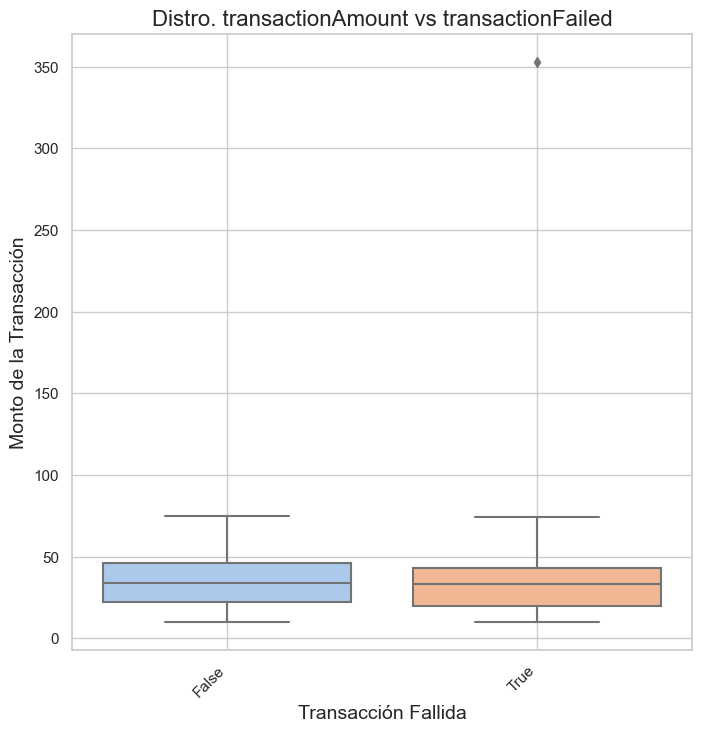

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))
# x: transactionFailed --> categórica
# y: transactionAmount --> numérica
boxplot = sns.boxplot(x='transactionFailed', y='transactionAmount', data=data, palette="pastel")

plt.title('Distro. transactionAmount vs transactionFailed', fontsize=16)
plt.xlabel('Transacción Fallida', fontsize=14)
plt.ylabel('Monto de la Transacción', fontsize=14)


boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

boxplot.xaxis.label.set_size(14)
boxplot.yaxis.label.set_size(14)

plt.grid(True)
plt.show()


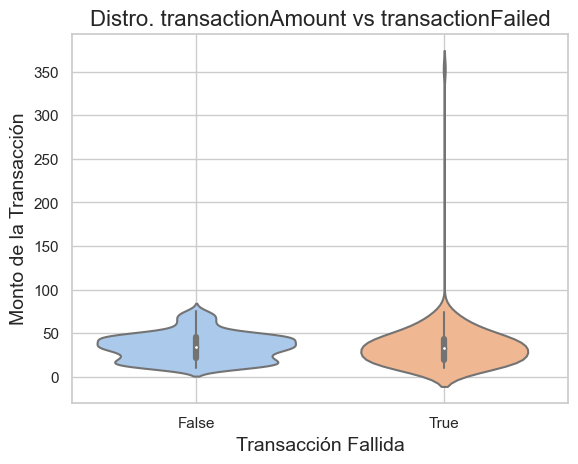

In [412]:
# x: transactionFailed --> categórica
# y: transactionAmount --> numérica
sns.violinplot(x = 'transactionFailed', y='transactionAmount', data = data, palette="pastel")

plt.title('Distro. transactionAmount vs transactionFailed', fontsize=16)
plt.xlabel('Transacción Fallida', fontsize=14)
plt.ylabel('Monto de la Transacción', fontsize=14)


boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

boxplot.xaxis.label.set_size(14)
boxplot.yaxis.label.set_size(14)

plt.grid(True)
plt.show()

In [413]:
# la media de transactionAmount 
transactionAmountMedia = data['transactionAmount'].mean()
print("La media de transactionAmount es:", transactionAmountMedia)

La media de transactionAmount es: 34.59871589085072


In [414]:
# la media de transactionAmount por transactionFailed
media_por_transactionFailed = data.groupby('transactionFailed')['transactionAmount'].mean()

print("La media de transactionAmount para transactionFailed=True es:", media_por_transactionFailed[True])
print("La media de transactionAmount para transactionFailed=False es:", media_por_transactionFailed[False])

La media de transactionAmount para transactionFailed=True es: 34.67857142857143
La media de transactionAmount para transactionFailed=False es: 34.56923076923077


Como se ve en los gráficos, la media para transactionAmount es prácticamente la misma, indepte del valor de transactionFailed


In [415]:
# este mvalor máximo de transactionAmount es el outlier, arriba de 350, que se ve en los gráficos anteriores
transactionAmountMax = data['transactionAmount'].max()

print("El máx de transactionAmount es: ", transactionAmountMax)

El máx de transactionAmount es:  353


In [382]:
data['transactionFailed'].value_counts()

transactionFailed
False    455
True     168
Name: count, dtype: int64

El único outlier en transactionAmount, es aprox. 10x la media. Voy a sacar esa observación.


In [416]:
# Saco ese elemento que es aprox 10x la media de txAmount
data_sin_outlier= data[data['transactionAmount'] != 353]
status(data_sin_outlier)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.233119,0,0.000000,67,float64
1,orderState,145,0.233119,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451768,302,0.485531,2,object
3,paymentMethodType,281,0.451768,0,0.000000,4,object
4,paymentMethodProvider,281,0.451768,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451768,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,66,int64
7,transactionFailed,0,0.000000,455,0.731511,2,bool
8,fraudulent,454,0.729904,107,0.172026,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [417]:
# la media de transactionAmount 
transactionAmountMediaSinOutlier = data_sin_outlier['transactionAmount'].mean()
print("La media de transactionAmount es:", transactionAmountMediaSinOutlier)

La media de transactionAmount es: 34.08681672025723


La variación en la media de transactionAmount es mínima. Voy a gráficar de nuevo.


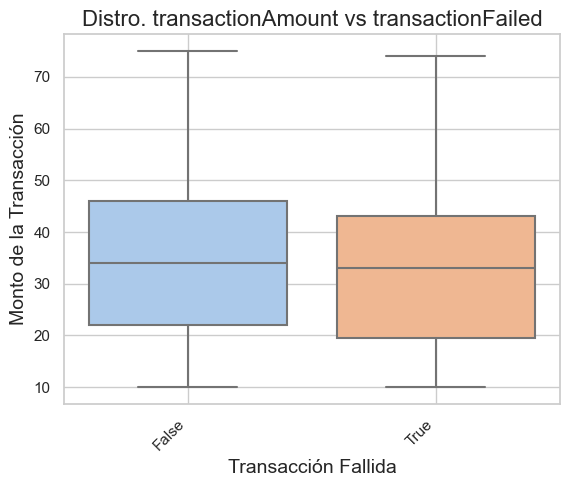

In [418]:
boxplot = sns.boxplot(x='transactionFailed', y='transactionAmount', data=data_sin_outlier, palette="pastel")

plt.title('Distro. transactionAmount vs transactionFailed', fontsize=16)
plt.xlabel('Transacción Fallida', fontsize=14)
plt.ylabel('Monto de la Transacción', fontsize=14)


boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

boxplot.xaxis.label.set_size(14)
boxplot.yaxis.label.set_size(14)

plt.grid(True)
plt.show()

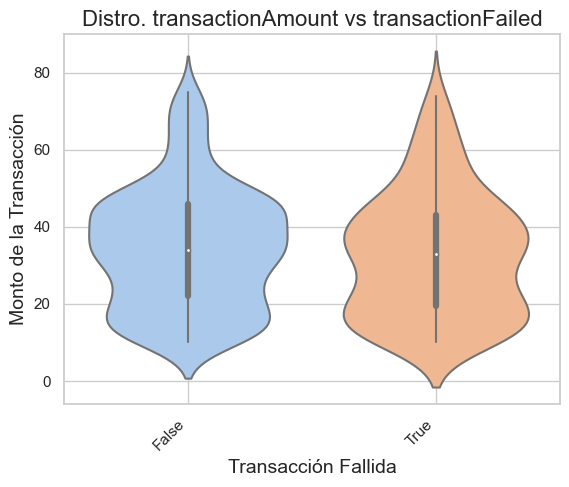

In [419]:
boxplot = sns.violinplot(x='transactionFailed', y='transactionAmount', data=data_sin_outlier, palette="pastel")

plt.title('Distro. transactionAmount vs transactionFailed', fontsize=16)
plt.xlabel('Transacción Fallida', fontsize=14)
plt.ylabel('Monto de la Transacción', fontsize=14)


boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

boxplot.xaxis.label.set_size(14)
boxplot.yaxis.label.set_size(14)

plt.grid(True)
plt.show()

Los gráficos mantienen practicamente los valores. Simplemente, la escala en las ordenadas cambia.


### 3.B) Análisis de categórica vs. categórica


La media de transactionAmount con orderState: pending es: 34.08681672025723
La media de transactionAmount con orderState: fulfilled es: 34.08681672025723
La media de transactionAmount con orderState: failed es: 34.08681672025723


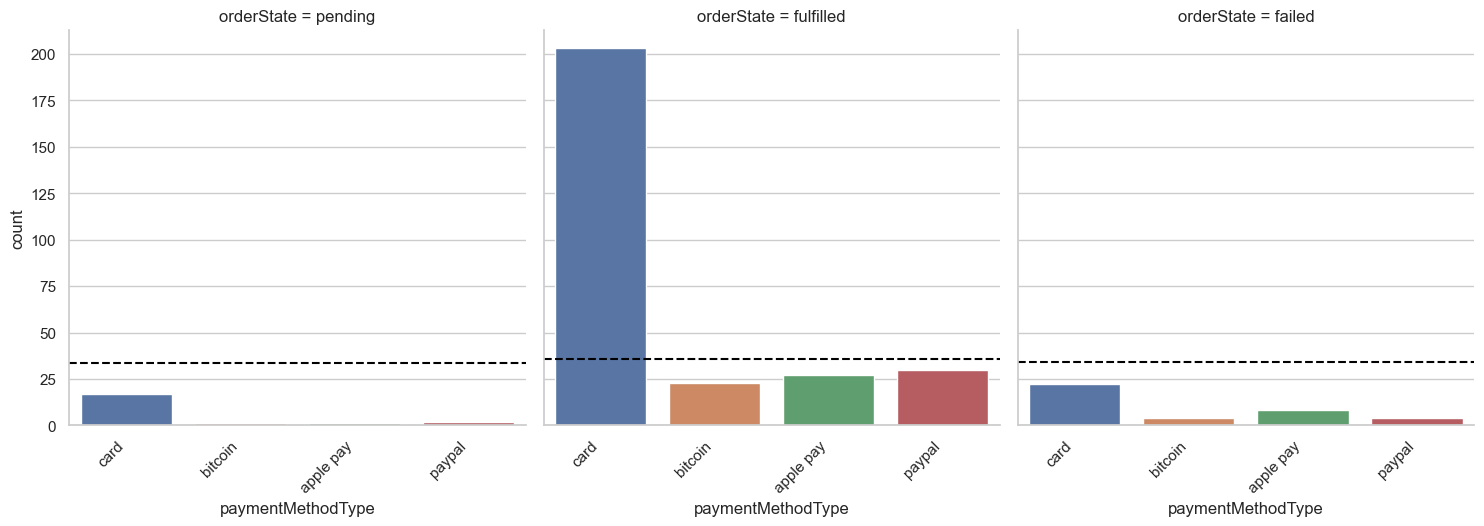

In [420]:
g = sns.catplot(x="paymentMethodType",
                col="orderState",
                data= data,
                kind="count")

for ax in g.axes.flat:
    order_state = ax.get_title().split(' = ')[1]
    
    subset = data[data['orderState'] == order_state]
    
    media = subset['transactionAmount'].mean()
    print("La media de transactionAmount con orderState:", order_state, "es:", transactionAmountMediaSinOutlier)
    
    ax.axhline(media, ls='--', color='black', label=f'Media: {media:.2f}')

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')


La media, de cantidad de txs con cada valor de orderState (pending, ... ) es similar, alrededor de 34.


### 3.C) Análisis de numérica vs. numérica


c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


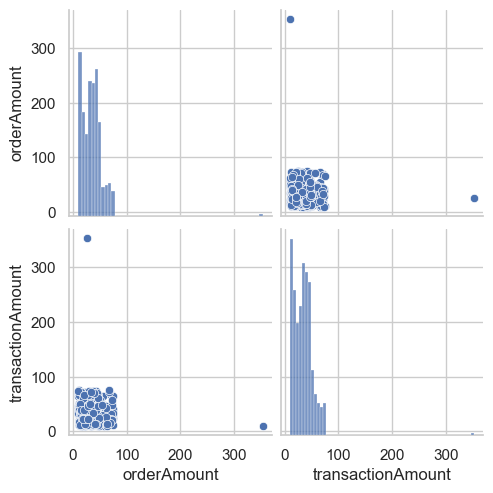

In [421]:
import matplotlib.pyplot as plt

data_aux = data[["orderAmount", "transactionAmount"]].copy()

sns.pairplot(data_aux, diag_kind='hist')




c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


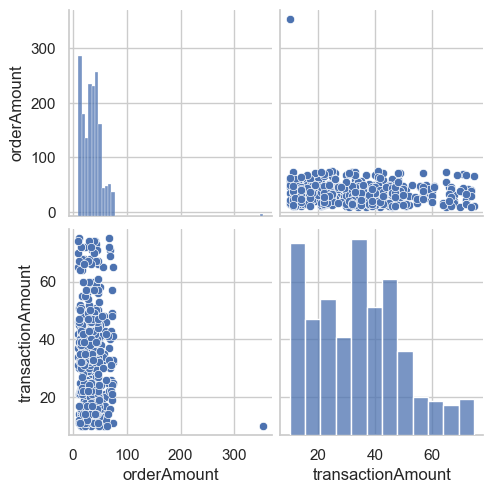

In [422]:
data_aux = data_sin_outlier[["orderAmount", "transactionAmount"]].copy()
sns.pairplot(data_aux, diag_kind='hist')


c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\csami\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


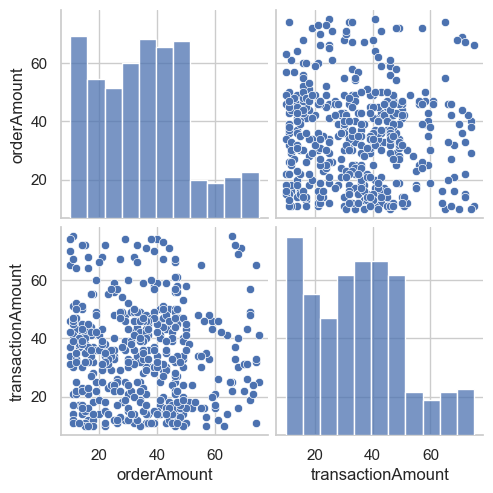

In [423]:
data_aux = data_sin_outlier2[["orderAmount", "transactionAmount"]].copy()
sns.pairplot(data_aux, diag_kind='hist')



# CORRELACIÓN 🤯

## 1) Samples

Volvemos al análisis de correlación: Gráficos 📊


## 4) Variables categóricas


<Axes: xlabel='count', ylabel='paymentMethodType'>

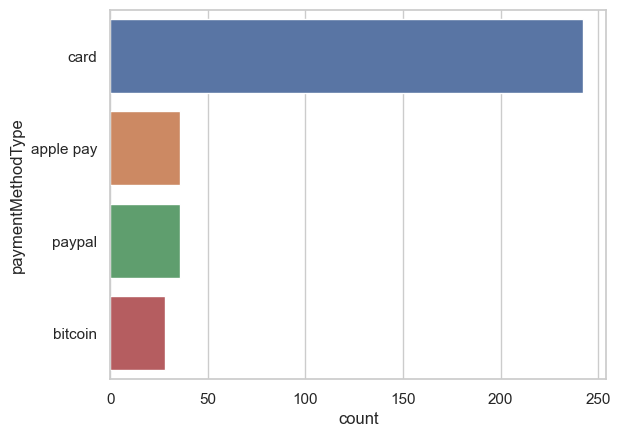

In [424]:
sns.countplot(y=data['paymentMethodType'], order = data['paymentMethodType'].value_counts().index)


Se observa la frecuencia de bitcoin, como medio de pago, menor a 30.

## 5) Volvemos al análisis de correlación: Gráficos 📊


In [425]:
numeric_data = data.select_dtypes(include='number')

data_corr = numeric_data.corr()
data_corr

,orderAmount,transactionAmount
orderAmount,1.000000,-0.077408
transactionAmount,-0.077408,1.000000


In [426]:
from funpymodeling.exploratory import corr_pair
data_corr = corr_pair(numeric_data)
data_corr

,v1,v2,R,R2
1,transactionAmount,orderAmount,-0.077408,0.005992
2,orderAmount,transactionAmount,-0.077408,0.005992


Coincide con los resultados de la celda anterior. Claro, dado que en la celda anteriror, antes de aplicar corr(), se selecciono solo la data de tipo "numeric"


In [427]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


##### Preparo los datos para el heatmap,


In [429]:
#Sacando las columnas de muchos valores unicos y haciendo un get dummies
data_ready = data.drop(['orderAmount', 'paymentMethodProvider', 'paymentMethodIssuer', 'transactionAmount'], axis=1)

data_ready.head(3)

,orderState,paymentMethodRegistrationFailure,paymentMethodType,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
0,pending,True,card,False,False,com,yahoo,only_letters,yes
1,fulfilled,True,bitcoin,False,True,com,yahoo,only_letters,no
2,fulfilled,False,card,False,False,com,yahoo,digits_and_letters,no


In [430]:
data_ready2=pd.get_dummies(data_ready, dummy_na=True)
data_ready2.columns

Index(['transactionFailed', 'orderState_failed', 'orderState_fulfilled',
       'orderState_pending', 'orderState_nan',
       'paymentMethodRegistrationFailure_False',
       'paymentMethodRegistrationFailure_True',
       'paymentMethodRegistrationFailure_nan', 'paymentMethodType_apple pay',
       'paymentMethodType_bitcoin', 'paymentMethodType_card',
       'paymentMethodType_paypal', 'paymentMethodType_nan', 'fraudulent_False',
       'fraudulent_True', 'fraudulent_nan', 'emailDomain_biz',
       'emailDomain_com', 'emailDomain_info', 'emailDomain_net',
       'emailDomain_org', 'emailDomain_weird', 'emailDomain_nan',
       'emailProvider_gmail', 'emailProvider_hotmail', 'emailProvider_other',
       'emailProvider_weird', 'emailProvider_yahoo', 'emailProvider_nan',
       'customerIPAddressSimplified_digits_and_letters',
       'customerIPAddressSimplified_only_letters',
       'customerIPAddressSimplified_nan', 'sameCity_no', 'sameCity_unknown',
       'sameCity_yes', 'sameCity

In [441]:
data_ready2.head()

,transactionFailed,orderState_failed,orderState_fulfilled,orderState_pending,orderState_nan,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodRegistrationFailure_nan,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,emailProvider_weird,emailProvider_yahoo,emailProvider_nan,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,customerIPAddressSimplified_nan,sameCity_no,sameCity_unknown,sameCity_yes,sameCity_nan
0,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
2,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


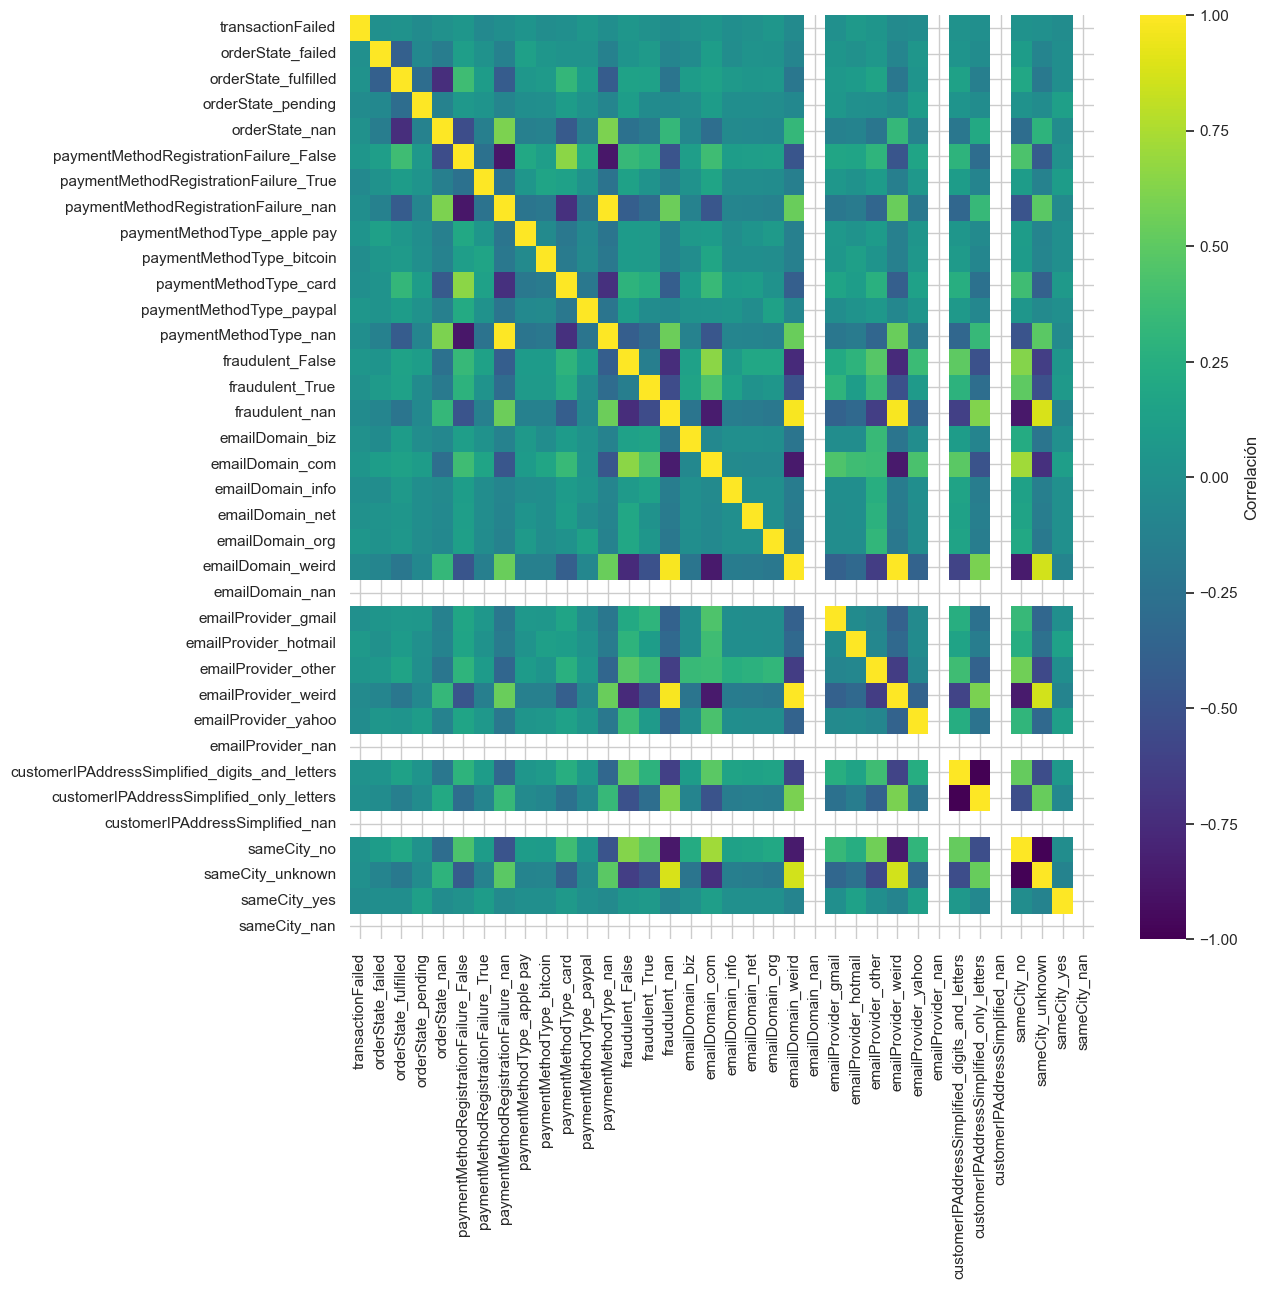

In [435]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(data = data_ready2.corr(), cmap='viridis', cbar_kws={'label': 'Correlación'})

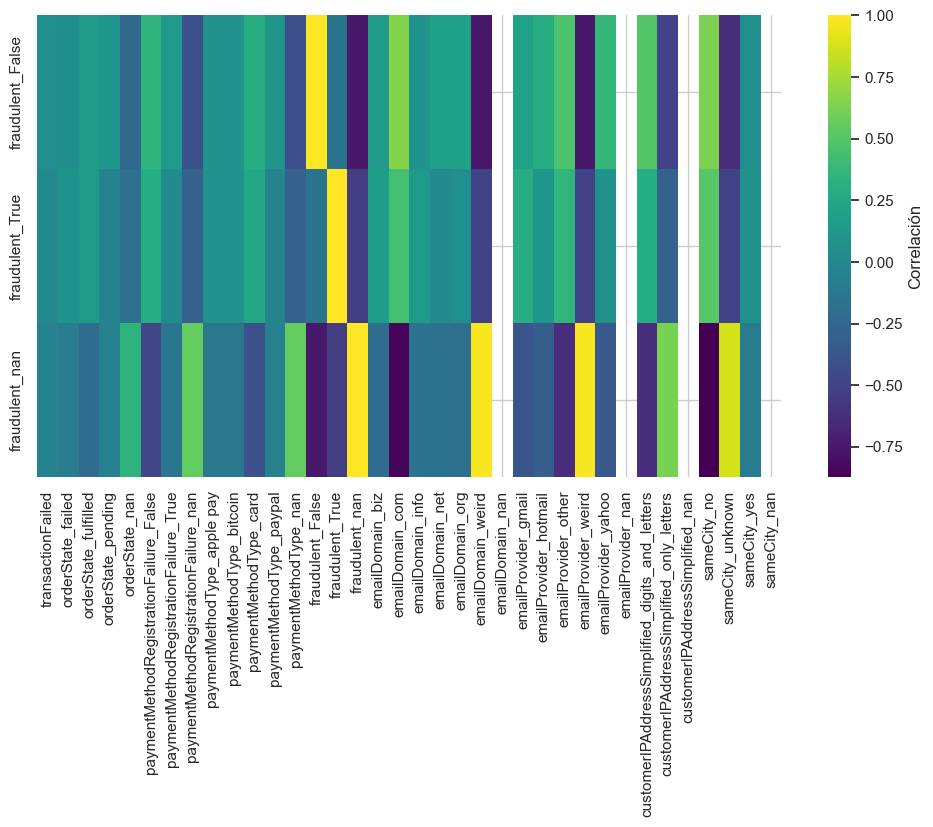

In [442]:
plt.figure(figsize=(12, 6))
f_columns = ['fraudulent_False', 'fraudulent_True', 'fraudulent_nan']
f_corr = data_ready2.corr().loc[f_columns]
heatmap = sns.heatmap(f_corr, cmap='viridis', cbar_kws={'label': 'Correlación'})



Vamos a inspeccionar un poco la info de correlaciones ... 

In [447]:
# matriz de correlación
correlation_matrix = data_ready2.corr()

# Pasola matriz de correlación en un DataFrame de pares de correlaciones
correlation_pairs = correlation_matrix.stack().reset_index()
correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtro para eliminar duplicados y correlaciones de una variable consigo misma
correlation_pairs = correlation_pairs[correlation_pairs['Variable1'] != correlation_pairs['Variable2']]

# Ordeno el df por el valor absoluto de la correlación en orden descendente
sorted_correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].sort_values(ascending=False).index)

# Muestro las filas con las correlaciones más altas para fraudulent_true
sorted_correlation_pairs[sorted_correlation_pairs['Variable1'].str.contains('fraudulent_true', case=False)]

,Variable1,Variable2,Correlation
477,fraudulent_True,sameCity_no,0.503159
465,fraudulent_True,emailDomain_com,0.439669
472,fraudulent_True,emailProvider_other,0.354402
470,fraudulent_True,emailProvider_gmail,0.297177
475,fraudulent_True,customerIPAddressSimplified_digits_and_letters,0.286533
453,fraudulent_True,paymentMethodRegistrationFailure_False,0.285627
458,fraudulent_True,paymentMethodType_card,0.247165
464,fraudulent_True,emailDomain_biz,0.160878
466,fraudulent_True,emailDomain_info,0.133416
450,fraudulent_True,orderState_fulfilled,0.133330


In [448]:
# Muestro las filas con las correlaciones más altas para fraudulent_false
sorted_correlation_pairs[sorted_correlation_pairs['Variable1'].str.contains('fraudulent_false', case=False)]

,Variable1,Variable2,Correlation
433,fraudulent_False,emailDomain_com,0.652738
445,fraudulent_False,sameCity_no,0.631623
443,fraudulent_False,customerIPAddressSimplified_digits_and_letters,0.501400
440,fraudulent_False,emailProvider_other,0.469317
442,fraudulent_False,emailProvider_yahoo,0.364012
421,fraudulent_False,paymentMethodRegistrationFailure_False,0.341745
439,fraudulent_False,emailProvider_hotmail,0.294533
426,fraudulent_False,paymentMethodType_card,0.291960
438,fraudulent_False,emailProvider_gmail,0.208943
436,fraudulent_False,emailDomain_org,0.194537


In [449]:
# Muestro las filas con las correlaciones más altas para fraudulent_nan
sorted_correlation_pairs[sorted_correlation_pairs['Variable1'].str.contains('fraudulent_nan', case=False)]

,Variable1,Variable2,Correlation
501,fraudulent_nan,emailDomain_weird,0.983709
505,fraudulent_nan,emailProvider_weird,0.983709
510,fraudulent_nan,sameCity_unknown,0.881933
508,fraudulent_nan,customerIPAddressSimplified_only_letters,0.618017
487,fraudulent_nan,paymentMethodRegistrationFailure_nan,0.550794
492,fraudulent_nan,paymentMethodType_nan,0.550794
484,fraudulent_nan,orderState_nan,0.334672
480,fraudulent_nan,transactionFailed,-0.046429
483,fraudulent_nan,orderState_pending,-0.060220
491,fraudulent_nan,paymentMethodType_paypal,-0.066532


### **Obtengan 5 insights que les llamo la atención del gráfico de correlación**

### - 1) Las variables que más correlacionan positivamente con las txs fraudulentas/ no fraudulentas son del mismo grupo.
####    - emailDomain_com
####    - sameCity_no
        
### - 2) Lo mismo sucede con la correlación negativa. En este caso con las variables:
####    - emailProvider_weird
####    - emailDomain_weird
####    - sameCity_unknown

Estas correlaciones, si bien las negativas son un poquito mas fuertes, no superan el valor de 0.5. 
O sea, tanto las txs fraudulentas como las no fraudulentas, correlacionan con las mismas variables y con intensidad similar. Esto indica, desde el punto de vista del actor del fraude, que lo esta haciendo bien.

### - 3) Las txs que no se saben presentan una correlación mas fuerte. Tanto positiva como negativa. 

emailProvider_weird, emailDomain_weird, sameCity_unknown tienen correlación positiva arriba de 0.8. 
emailDomain_com, sameCity_no tienen correlación negativa arriba de 0.8.

El tema es que alrededor del 75% de las txs son "fradulent_nan".

### - 4) emailProvider 

Direcciones gmail correlacionan 0.3 con las txs fradulentas, 0.2 con las txs no fraudulentas y aprox -0.4 con las txs_nan. 
Direcciones yahoo, correlacionan 0.36 con txs buenas y mucho menos con txs fraudulenta, menos de 0.1.

### - 5) customerIPAddressSimplified_digits_and_letters

Esta variable correlaciona positivamente casi el doble, 0.5 vs 0.28, con txs con fraude que con txs sin fraude. 
La correlación negativa, con las misma variable, es consistente con esto. 

### - 6) Método de pago 

En las txs fraudulentas y no fraudulentas, el método de pago con mayor correlación positiva es la tarjeta. Alrededor de 0.25.
Esta correlación es -0.4 para las txs que no se sabe si fueron fraude o no. 




## 6) Análisis de correlaciones no lineales basadas en teoría de la información


No pude instalar minepy local
Dejo link al drive

--> https://colab.research.google.com/drive/1Dy0bhHRnskHbWawEYkgh6gXV6LtUF62Y?authuser=1#scrollTo=JLlBr42SN1s2

In [450]:

from __future__ import division
from minepy import MINE



ModuleNotFoundError: No module named 'minepy'